# Visualizing random number generation with Pandas
We can apply some of the skills in Pandas you've learned in this module to simulate data and calculate the standard error of the mean across different sample sizes. In an earlier module, we saw how it was easy to calculate the sample average per replication with NumPy all in one line of code! Now we can use some of the additional functionality of Pandas to visualize how variability in the means changes across sample size.

In this notebook, we will:

- Simulate repeated samples from a uniform distribution

- Compute the mean and standard deviation for each replication

- Convert NumPy arrays into Pandas DataFrames

Use Pandas plotting tools to visualize how the standard error of the mean changes with sample size

This helps us understand why larger samples produce more stable estimates.

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Random Numbers

We generate 7 random numbers from a uniform distribution, 25 times. We do this by initializing a random number generator and sampling an array of 25 rows and 7 columns.


In [2]:
rg = np.random.default_rng(2100)
random_arr = rg.random((25, 7))
print(random_arr[:5, :]) # show the first 10 rows to get an idea of the data
random_arr.shape

[[0.29903711 0.94885201 0.26654812 0.56245983 0.04065328 0.36256605
  0.31074318]
 [0.02194126 0.22750713 0.44676944 0.50925882 0.20031094 0.75986071
  0.08795936]
 [0.52239343 0.66922298 0.84199534 0.32375193 0.10112876 0.47771869
  0.96834321]
 [0.61390991 0.13558895 0.21282414 0.40786942 0.1406208  0.66198709
  0.71768881]
 [0.72701141 0.85859247 0.33080681 0.35247246 0.01734227 0.20309907
  0.03787868]]


(25, 7)

## Convert NumPy Array to Pandas DataFrame

Each row represents one replication.

In [3]:
random_df = pd.DataFrame(random_arr)
random_df.info()
random_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       25 non-null     float64
 1   1       25 non-null     float64
 2   2       25 non-null     float64
 3   3       25 non-null     float64
 4   4       25 non-null     float64
 5   5       25 non-null     float64
 6   6       25 non-null     float64
dtypes: float64(7)
memory usage: 1.5 KB


,0,1,2,3,4,5,6
0,0.299037,0.948852,0.266548,0.562460,0.040653,0.362566,0.310743
1,0.021941,0.227507,0.446769,0.509259,0.200311,0.759861,0.087959
2,0.522393,0.669223,0.841995,0.323752,0.101129,0.477719,0.968343
3,0.613910,0.135589,0.212824,0.407869,0.140621,0.661987,0.717689
4,0.727011,0.858592,0.330807,0.352472,0.017342,0.203099,0.037879


## Compute Means & Standard Deviations Per Replication

Since each row is a replication, we want to compute the mean for every row to eventually visualize how much it varies.

In [4]:
rep_means = random_df.mean(axis=1)
print(type(rep_means))
rep_means

<class 'pandas.core.series.Series'>


0     0.398694
1     0.321944
2     0.557793
3     0.412927
4     0.361029
5     0.708555
6     0.463230
7     0.423296
8     0.325789
9     0.427621
10    0.469872
11    0.418257
12    0.451017
13    0.455458
14    0.226091
15    0.380897
16    0.442719
17    0.410272
18    0.449230
19    0.575049
20    0.478911
21    0.436111
22    0.609424
23    0.318616
24    0.754405
dtype: float64

The `rep_means` data type is a Pandas Series, but let's transform it into a DataFrame for more functionality and add an ID column for later use with plotting.

In [5]:
rep_means = pd.DataFrame(rep_means, columns=['rep_mean'])
rep_means = rep_means.reset_index().rename(columns={'index': 'replication'}) # create a replication ID column
rep_means

,replication,rep_mean
0,0,0.398694
1,1,0.321944
2,2,0.557793
3,3,0.412927
4,4,0.361029
5,5,0.708555
6,6,0.463230
7,7,0.423296
8,8,0.325789
9,9,0.427621


## Visualize Replication Means
In later modules we will focus directly on visualization. Here we will build a simple plot for demonstration using Pandas. We will plot it using a scatter plot for cleaner variability.

<AxesSubplot: xlabel='replication', ylabel='rep_mean'>

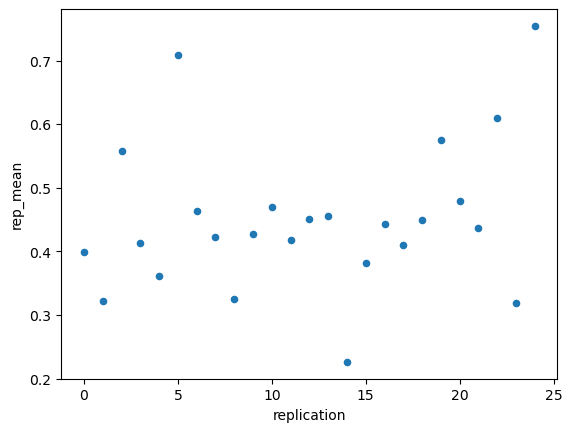

In [6]:
rep_means.plot.scatter(x='replication', y='rep_mean')

As you can see, the means are kind of all over the place, with no distinct pattern.

## Compare means for small vs. large sample sizes
That was for a relatively small sample size: 7 datapoints sampled for every replication.

Let's visualize what the means would be for a much larger sample size: 500 datapoints per replication.

In [7]:
# Large sample (n=500)
random_arr500 = pd.DataFrame(rg.random((25, 500)))
rep_means500 = random_arr500.mean(axis=1)
rep_means_all = pd.DataFrame(rep_means500, columns=['rep_mean500'])
rep_means_all = rep_means_all.reset_index().rename(columns={'index': 'replication'}) # create a replication ID column
rep_means_all

,replication,rep_mean500
0,0,0.520780
1,1,0.487293
2,2,0.497433
3,3,0.482891
4,4,0.495457
5,5,0.469089
6,6,0.478277
7,7,0.493964
8,8,0.488114
9,9,0.514825


Let's add a column for the replications for the smaller sample size of 7.

In [8]:
rep_means_all['rep_mean7'] = rep_means['rep_mean']
rep_means_all

,replication,rep_mean500,rep_mean7
0,0,0.520780,0.398694
1,1,0.487293,0.321944
2,2,0.497433,0.557793
3,3,0.482891,0.412927
4,4,0.495457,0.361029
5,5,0.469089,0.708555
6,6,0.478277,0.463230
7,7,0.493964,0.423296
8,8,0.488114,0.325789
9,9,0.514825,0.427621


Now let's visualize the comparison. Don't worry about the plotting details. We'll get into that in later modules.

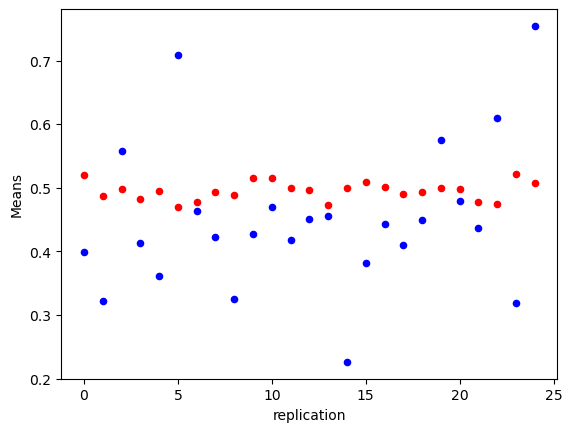

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
rep_means_all.plot.scatter(x='replication', y='rep_mean7', color='blue', ax=ax)
rep_means_all.plot.scatter(x='replication', y='rep_mean500', color='red', ax=ax)
ax.set_ylabel('Means')
plt.show()

You can see how there is much less variation in the means for replications with the larger 500 sample size (red dots) vs. the smaller sample size of 7 (blue dots). This means there is a smaller standard error on the means with larger samples sizes, as well.